The below model is for training CIFAR-10 dataset which has images of 10 classes. It has 50000 training and 10000 test datasets. Here we use transition blocks ( 1x1convolution and Maxpooling ) between the sequential 3x3 convolutions so that the network see all features better. 

In [0]:
from keras import backend as K   #Impoprting Keras libraries
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10    #Importing CIFAR10 from keras 
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data() # loading the CIFAR10 into train and test variables
num_train, img_channels, img_rows, img_cols =  train_features.shape #Setting number of image channels, coloums, rows
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

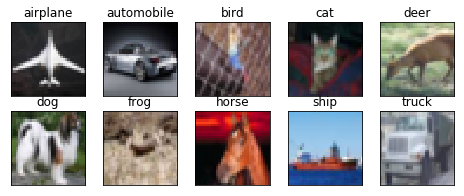

In [34]:
class_names = ['airplane','automobile','bird','cat','deer',  # Plotting 10 images of different classes present in CIFAR10
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):                   #Function to plot the graph of accuracy and loss
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255           #Dividing the train and test data by color range of the image
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [45]:
# Define the model            
# Here Batch Normalization is used after every convolution to highlight the minute gradients and features in the layer and regularization is used to reduce overfitting of the model and
# padding is used alternatively between convolutions to keep the resolution of the feature maps same.Transition layer is used after every 5 or 6 convolutions.

model = Sequential()
model.add(Convolution2D(16, 3, 3, border_mode='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(512, 3, 3))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, 1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3, border_mode='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(256, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, 1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3, border_mode='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(64, 2, 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, 1))

model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-pac

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_153 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_56 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
dropout_126 (Dropout)        (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_57 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_127 (Dropout)        (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 30, 30, 64)        18496     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=80)`
  if sys.path[0] == '':


Epoch 1/80
390/390 [==============================] - 93s 239ms/step - loss: 2.0110 - acc: 0.2679 - val_loss: 2.1758 - val_acc: 0.2871
Epoch 2/80
390/390 [==============================] - 86s 220ms/step - loss: 1.5323 - acc: 0.4411 - val_loss: 1.3918 - val_acc: 0.5021
Epoch 3/80
390/390 [==============================] - 86s 220ms/step - loss: 1.3121 - acc: 0.5270 - val_loss: 1.2531 - val_acc: 0.5530
Epoch 4/80
390/390 [==============================] - 86s 220ms/step - loss: 1.1684 - acc: 0.5818 - val_loss: 1.0812 - val_acc: 0.6209
Epoch 5/80
390/390 [==============================] - 86s 220ms/step - loss: 1.0737 - acc: 0.6188 - val_loss: 1.0384 - val_acc: 0.6347
Epoch 6/80
390/390 [==============================] - 86s 220ms/step - loss: 1.0027 - acc: 0.6462 - val_loss: 0.9476 - val_acc: 0.6693
Epoch 7/80
390/390 [==============================] - 86s 220ms/step - loss: 0.9424 - acc: 0.6690 - val_loss: 0.8686 - val_acc: 0.6929
Epoch 8/80
390/390 [==============================] - 8

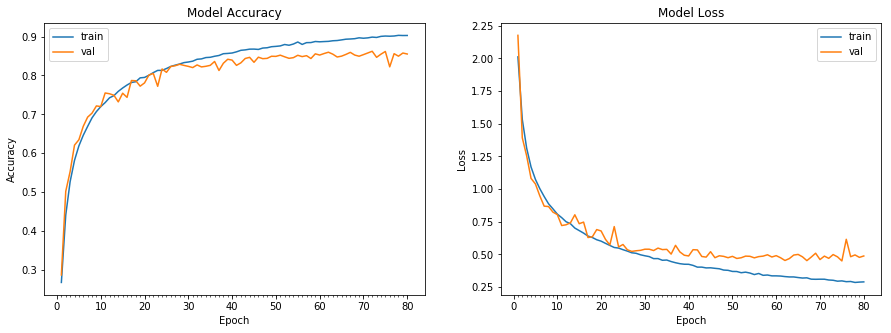

Accuracy on test data is: 85.52


In [46]:
from keras.preprocessing.image import ImageDataGenerator # Imagedatagenerator library is used for data augmentation with no horizontal flips

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

When compared to previous model we can see that the accuracy of the current one is increased by 2% (85.52)